### Basic library imports

In [31]:
import os
import pandas as pd

### Read Dataset

In [32]:
DATASET_FOLDER = '../dataset/'
train = pd.read_csv(os.path.join(DATASET_FOLDER, 'train.csv'))
test = pd.read_csv(os.path.join(DATASET_FOLDER, 'test.csv'))
sample_test = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test.csv'))
sample_test_out = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test_out.csv'))

### Run Sanity check using src/sanity.py

In [33]:
!python sanity.py --test_filename ../dataset/sample_test.csv --output_filename ../dataset/sample_test_out.csv

{'gallon', 'foot', 'gram', 'ton', 'centimetre', 'metre', 'microlitre', 'millimetre', 'litre', 'millilitre', 'yard', 'ounce', 'cubic foot', 'kilowatt', 'centilitre', 'cubic inch', 'volt', 'cup', 'quart', 'decilitre', 'pint', 'kilovolt', 'fluid ounce', 'microgram', 'milligram', 'imperial gallon', 'kilogram', 'inch', 'watt', 'pound', 'millivolt'}
Parsing successfull for file: ../dataset/sample_test_out.csv


In [34]:
!python sanity.py --test_filename ../dataset/sample_test.csv --output_filename ../dataset/sample_test_out_fail.csv

{'ounce', 'centimetre', 'pint', 'kilogram', 'watt', 'quart', 'fluid ounce', 'pound', 'decilitre', 'yard', 'millimetre', 'milligram', 'imperial gallon', 'millilitre', 'microgram', 'cubic inch', 'microlitre', 'kilovolt', 'volt', 'cubic foot', 'gram', 'foot', 'gallon', 'ton', 'litre', 'centilitre', 'kilowatt', 'inch', 'millivolt', 'metre', 'cup'}
Error: Invalid unit [lbs] found in 6.75 lbs. Allowed units: {'ounce', 'centimetre', 'pint', 'kilogram', 'watt', 'quart', 'fluid ounce', 'pound', 'decilitre', 'yard', 'millimetre', 'milligram', 'imperial gallon', 'millilitre', 'microgram', 'cubic inch', 'microlitre', 'kilovolt', 'volt', 'cubic foot', 'gram', 'foot', 'gallon', 'ton', 'litre', 'centilitre', 'kilowatt', 'inch', 'millivolt', 'metre', 'cup'}


### Download images

In [35]:
from utils import download_images
download_images(sample_test['image_link'], '../images')

{'ounce', 'quart', 'foot', 'yard', 'ton', 'metre', 'gram', 'kilovolt', 'fluid ounce', 'decilitre', 'milligram', 'cubic inch', 'centilitre', 'volt', 'cup', 'cubic foot', 'pint', 'millimetre', 'litre', 'millilitre', 'imperial gallon', 'kilowatt', 'millivolt', 'watt', 'pound', 'centimetre', 'microlitre', 'microgram', 'gallon', 'inch', 'kilogram'}


Exception in thread Thread-166 (_handle_workers):
Traceback (most recent call last):
  File "c:\Users\mariy\AppData\Local\Programs\Python\Python312\Lib\threading.py", line 1052, in _bootstrap_inner
    self.run()
  File "C:\Users\mariy\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\mariy\AppData\Local\Programs\Python\Python312\Lib\threading.py", line 989, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\mariy\AppData\Local\Programs\Python\Python312\Lib\multiprocessing\pool.py", line 522, in _handle_workers
    cls._wait_for_updates(current_sentinels, change_notifier)
  File "c:\Users\mariy\AppData\Local\Programs\Python\Python312\Lib\multiprocessing\pool.py", line 502, in _wait_for_updates
    wait(sentinels, timeout=timeout)
  File "c:\Users\mariy\AppData\Local\Programs\Python\Python312\Lib\multiprocessing\connection.py", line 1066, in wait
    ready_handles = _exhaust

In [8]:
assert len(os.listdir('../images')) > 0

In [ ]:
!rm -rf ../images

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

<PIL.Image.Image image mode=RGB size=224x224 at 0x2043C6479B0>


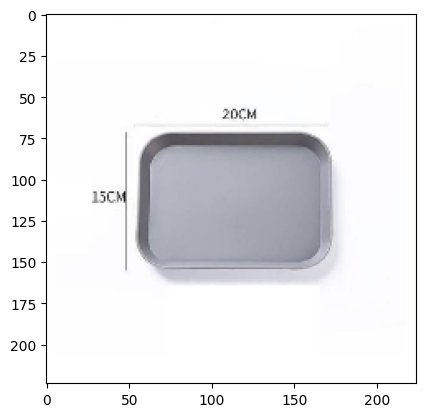

In [2]:
test_image = 'E:\\github repository\\Amazon-ML-Hackathon\\student_resource 3\\images\\41-NCxNuBxL.jpg'
Image(test_image,width=224,height=224)
img = image.load_img(test_image, target_size=(224, 224))
print(img)
plt.imshow(img)

In [3]:
model = tf.keras.applications.mobilenet_v2.MobileNetV2()
resizedimg = image.img_to_array(img)
finalimg = np.expand_dims(resizedimg,axis=0)
finalimg = tf.keras.applications.mobilenet_v2.preprocess_input(finalimg)
finalimg.shape
predictions = model.predict(finalimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step


In [5]:
results = imagenet_utils.decode_predictions(predictions)
print(results)
print(results[0][1][1])

[[('n04404412', 'television', 0.66064805), ('n04476259', 'tray', 0.101882555), ('n03761084', 'microwave', 0.061022833), ('n04152593', 'screen', 0.020884737), ('n04372370', 'switch', 0.014369518)]]
tray


In [9]:
import os
import string
import pandas as predictions
import numpy as np
import matplotlib.pyplot as plt
import time

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet

In [11]:
import requests
import os

# Define a directory to save downloaded images
download_dir = "E:\github repository\Amazon-ML-Hackathon\student_resource 3\images"

os.makedirs(download_dir, exist_ok=True)  # Create directory if it doesn't exist

with open("E:\github repository\Amazon-ML-Hackathon\student_resource 3\dataset\sample_test.csv", "r") as f:
    next(f)  # Skip the header row if it exists

    for line in f:
        data = line.strip().split(",")

        image_url = data[1]  # Assuming the image URL is in the second column

        filename = os.path.basename(image_url)  # Extract filename from URL

        # Download the image
        response = requests.get(image_url, stream=True)
        if response.status_code == 200:
            # Check for successful download
            with open(os.path.join(download_dir, filename), "wb") as out_file:
                for chunk in response.iter_content(1024):
                    out_file.write(chunk)
            print(f"Downloaded image: {filename}")
        else:
            print(f"Error downloading image: {image_url}")

<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:11: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:11: SyntaxWarning: invalid escape sequence '\g'
C:\Users\mariy\AppData\Local\Temp\ipykernel_25504\2836018607.py:5: SyntaxWarning: invalid escape sequence '\g'
  download_dir = "E:\github repository\Amazon-ML-Hackathon\student_resource 3\images"
C:\Users\mariy\AppData\Local\Temp\ipykernel_25504\2836018607.py:11: SyntaxWarning: invalid escape sequence '\g'
  with open("E:\github repository\Amazon-ML-Hackathon\student_resource 3\dataset\sample_test.csv", "r") as f:


Downloaded image: 41-NCxNuBxL.jpg
Downloaded image: 41-NCxNuBxL.jpg
Downloaded image: 417NJrPEk+L.jpg
Downloaded image: 417SThj+SrL.jpg
Downloaded image: 417SThj+SrL.jpg
Downloaded image: 41ADVPQgZOL.jpg
Downloaded image: 41nblnEkJ3L.jpg
Downloaded image: 41nblnEkJ3L.jpg
Downloaded image: 41o3iis9E7L.jpg
Downloaded image: 41pvwR9GbaL.jpg
Downloaded image: 41uwo4PVnuL.jpg
Downloaded image: 41uwo4PVnuL.jpg
Downloaded image: 41ygXRvf8lL.jpg
Downloaded image: 41ygXRvf8lL.jpg
Downloaded image: 41zgjN+zW3L.jpg
Downloaded image: 51+oHGvSvuL.jpg
Downloaded image: 51+oHGvSvuL.jpg
Downloaded image: 51-WIOx5pxL.jpg
Downloaded image: 51-WIOx5pxL.jpg
Downloaded image: 510xYFNYQ8L.jpg
Downloaded image: 510xYFNYQ8L.jpg
Downloaded image: 510xYFNYQ8L.jpg
Downloaded image: 514bY8c4ZIL.jpg
Downloaded image: 514bY8c4ZIL.jpg
Downloaded image: 514pScQdlCL.jpg
Downloaded image: 514pScQdlCL.jpg
Downloaded image: 51BEuVR4ZzL.jpg
Downloaded image: 51BEuVR4ZzL.jpg
Downloaded image: 51EBBqNOJ1L.jpg
Downloaded ima

In [23]:
def label_function(img_paths):
    labels = []
    for i, img_path in enumerate(img_paths):
        labels.append((i,img_path))
    return labels

In [24]:
import os
from sklearn.model_selection import train_test_split

image_dir = "E:\github repository\Amazon-ML-Hackathon\student_resource 3\images"

# Load image paths and labels (assuming you have corresponding labels)
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]
# print(image_paths)
labels = label_function(image_paths)
# print(len(image_paths))
# print(len(labels))

# Split into train, test, and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)
test_images, val_images, test_labels, val_labels = train_test_split(val_images, val_labels, test_size=0.5, random_state=42)

# Print the sizes of the sets
print("Train set size:", len(train_images))
print("Validation set size:", len(val_images))
print("Test set size:", len(test_images))

['E:\\github repository\\Amazon-ML-Hackathon\\student_resource 3\\images\\41-NCxNuBxL.jpg', 'E:\\github repository\\Amazon-ML-Hackathon\\student_resource 3\\images\\417NJrPEk+L.jpg', 'E:\\github repository\\Amazon-ML-Hackathon\\student_resource 3\\images\\417SThj+SrL.jpg', 'E:\\github repository\\Amazon-ML-Hackathon\\student_resource 3\\images\\41ADVPQgZOL.jpg', 'E:\\github repository\\Amazon-ML-Hackathon\\student_resource 3\\images\\41nblnEkJ3L.jpg', 'E:\\github repository\\Amazon-ML-Hackathon\\student_resource 3\\images\\41o3iis9E7L.jpg', 'E:\\github repository\\Amazon-ML-Hackathon\\student_resource 3\\images\\41pvwR9GbaL.jpg', 'E:\\github repository\\Amazon-ML-Hackathon\\student_resource 3\\images\\41uwo4PVnuL.jpg', 'E:\\github repository\\Amazon-ML-Hackathon\\student_resource 3\\images\\41ygXRvf8lL.jpg', 'E:\\github repository\\Amazon-ML-Hackathon\\student_resource 3\\images\\41zgjN+zW3L.jpg', 'E:\\github repository\\Amazon-ML-Hackathon\\student_resource 3\\images\\51+oHGvSvuL.jpg'

<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
C:\Users\mariy\AppData\Local\Temp\ipykernel_25504\1140500294.py:5: SyntaxWarning: invalid escape sequence '\g'
  image_dir = "E:\github repository\Amazon-ML-Hackathon\student_resource 3\images"


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load data and extract features
data = pd.read_csv("sample_test.csv")
entity_types = data["entity_name"].str.split(" ", expand=True)[0]  # Assuming entity name is in first word

# Encode entity types for classification
le = LabelEncoder()
entity_types_encoded = le.fit_transform(entity_types)

# Split data
X_train, X_test, y_train, y_test = train_test_split(entity_types_encoded.reshape(-1, 1), data["group_id"], test_size=0.2)

# Train a multi-class classifier (replace with your model)
from sklearn.svm import SVC
clf = SVC(gamma="auto")
clf.fit(X_train, y_train)

# Predict units on test data
predicted_units = clf.predict(X_test.reshape(-1, 1))

# Convert units using your function
for i, row in data.iterrows():
  original_value = ...  # Get original value from your data
  predicted_unit = le.inverse_transform([predicted_units[i]])[0]
  converted_value = convert_unit(original_value, row["entity_name"].split()[1], predicted_unit)
  # Update the data with converted values (optional)
  # data.loc[i, "prediction"] = converted_value